In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('ch2_co2_levels.csv')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
datestamp    2284 non-null object
co2          2284 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


# Finding missing values in a DataFrame

- missing .null()
- not missing .notnull()

In [6]:
df.isnull().head()

,datestamp,co2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [7]:
df.notnull().head()

,datestamp,co2
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


# Counting missing values in a DataFrame

In [8]:
df.isnull().sum()

datestamp     0
co2          59
dtype: int64

# Replacing missing values in a DataFrame

In [10]:
df.head(10)

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
5,1958-05-03,316.9
6,1958-05-10,NaN
7,1958-05-17,317.5
8,1958-05-24,317.9
9,1958-05-31,NaN


In [45]:
df = df.fillna(method='bfill')

In [46]:
df.head(10)

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,317.5
1958-05-17,317.5
1958-05-24,317.9


# Let's practice!

# Find missing values


In [37]:
co2_levels = pd.read_csv('ch2_co2_levels.csv')


In [38]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


# Handle missing values


In [39]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


# Plot aggregates of your data

## Moving averages
- In the field of time series analysis, a moving average can be used for many different purposes:
 - smoothing out short-term fluctuations
 - removing outliers
  - highlighting long-term trends or cycles.

# The moving average model

In [43]:
#df = pd.read_csv('ch2_co2_levels.csv')

df['datestamp'] = pd.to_datetime(df['datestamp'])
df = df.set_index('datestamp')
df.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


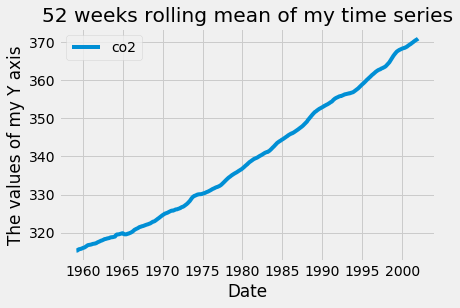

In [47]:
co2_levels_mean = df.rolling(window=52).mean()  # 52 weeks a year
ax = co2_levels_mean.plot()
ax.set_xlabel("Date")
ax.set_ylabel("The values of my Y axis")
ax.set_title("52 weeks rolling mean of my time series")
plt.show()

# Computing aggregate values of your time series

In [26]:
df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

In [27]:
df.index.month

Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)

In [28]:
df.index.year

Int64Index([1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
            ...
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001],
           dtype='int64', name='datestamp', length=2284)

# Plotting aggregate values of your time series

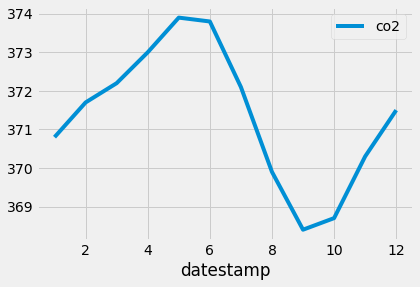

In [29]:
index_month = df.index.month

co2_levels_by_month = df.groupby(index_month).max()
co2_levels_by_month.plot()
plt.show()

---
# Let's practice!

# Display rolling averages


---
# Summarizing the values in your time series data

## Obtaining numerical summaries of your data
- What is the average value of this data?
- What is the maximum value observed in this time series?

The `.describe()` method automatically computes key statistics of all
numeric columns in your DataFrame

In [30]:
df.describe()

,co2
count,2284.000000
mean,339.657750
std,17.100899
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


# Summarizing your data with boxplots

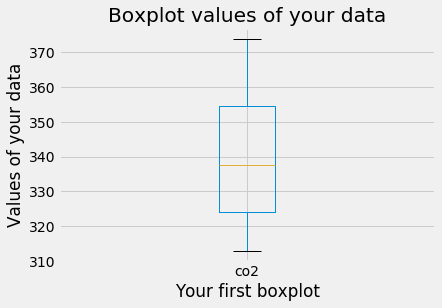

In [31]:
ax1 = df.boxplot()
ax1.set_xlabel('Your first boxplot')
ax1.set_ylabel('Values of your data')
ax1.set_title('Boxplot values of your data')
plt.show()

# Summarizing your data with histograms

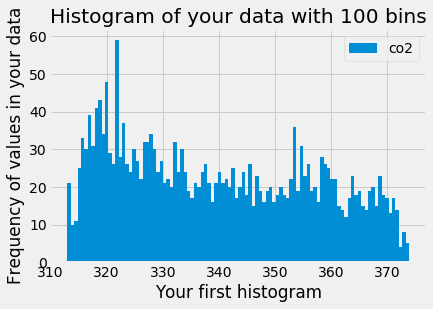

In [32]:
ax2 = df.plot(kind='hist', bins=100)
ax2.set_xlabel('Your first histogram')
ax2.set_ylabel('Frequency of values in your data')
ax2.set_title('Histogram of your data with 100 bins')
plt.show()

# Summarizing your data with density plots

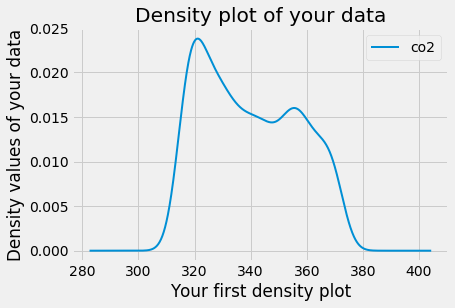

In [33]:
ax3 = df.plot(kind='density', linewidth=2)
ax3.set_xlabel('Your first density plot')
ax3.set_ylabel('Density values of your data')
ax3.set_title('Density plot of your data')
plt.show()

---
# Let's practice!